In [102]:
import os
os.chdir('C:/Users/Rohit/Anaconda3/Participants_Data_Used_Cars')

In [103]:
import xlrd
import csv

def csv_from_excel():
    wb = xlrd.open_workbook('Data_Train.xlsx')
    sh = wb.sheet_by_name('Sheet1')
    your_csv_file = open('cars_used.csv', 'w')
    wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)

    wb1 = xlrd.open_workbook('Data_Test.xlsx')
    sh1 = wb1.sheet_by_name('Sheet1')
    your_csv_file1 = open('cars_test.csv', 'w')
    wr1 = csv.writer(your_csv_file1, quoting=csv.QUOTE_ALL)

    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))

    for rownum1 in range(sh1.nrows):
        wr1.writerow(sh1.row_values(rownum1))

    your_csv_file.close()
    your_csv_file1.close()

# runs the csv_from_excel function:
csv_from_excel()

There are a few blank rows in the dataset which needs to be removed. The following piece of code does the work.

In [104]:
#Removes completely blank rows from the file
file = 'cars_train.csv'
file1 = 'cars_test.csv'
try:
    file_object = open(file, 'r')
    lines = csv.reader(file_object, delimiter=',', quotechar='"')
    flag = 0
    data=[]
    for line in lines:
        if line == []:
            flag =1
            continue
        else:
            data.append(line)
    file_object.close()
    if flag ==1: #if blank line is present in file
        file_object = open(file, 'w')
        for line in data:
            str1 = ','.join(line)
            file_object.write(str1+"\n")
        file_object.close() 
except Exception as e:
    print (e)
    
try:
    file_object1 = open(file1, 'r')
    lines1 = csv.reader(file_object1, delimiter=',', quotechar='"')
    flag1 = 0
    data1=[]
    for line1 in lines1:
        if line1 == []:
            flag1 =1
            continue
        else:
            data1.append(line1)
    file_object1.close()
    if flag1 ==1: #if blank line is present in file
        file_object1 = open(file1, 'w')
        for line1 in data1:
            str2 = ','.join(line1)
            file_object1.write(str2+"\n")
        file_object1.close() 
except Exception as e1:
    print (e1)

In [105]:
import pandas as pd
import numpy as py
cars_train = pd.read_csv('cars_train.csv')
cars_test = pd.read_csv('cars_test.csv')
cars_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [106]:
cars_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014.0,40929.0,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013.0,54493.0,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017.0,34000.0,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012.0,139000.0,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014.0,29000.0,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [107]:
cars_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null float64
Kilometers_Driven    6019 non-null float64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(4), object(9)
memory usage: 611.4+ KB


Deciding on the technique for handling the missing values depends on the percentage of missing values in each column.

,Total,Percent
New_Price,5195,0.863100
Seats,42,0.006978
Power,36,0.005981
Engine,36,0.005981
Mileage,2,0.000332


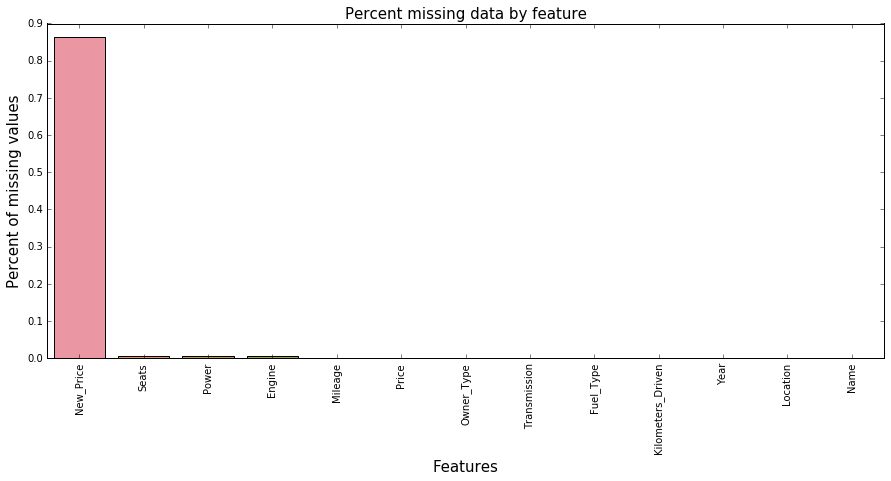

In [108]:
#Finding percentage of missing values
import seaborn as sns
import matplotlib.pyplot as plt
total = cars_train.isnull().sum().sort_values(ascending=False)
percent = (cars_train.isnull().sum()/cars_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [109]:
new_mileage_tr = cars_train.Mileage.str.extract('(\d+\.\d+)')
new_mileage_te = cars_test.Mileage.str.extract('(\d+\.\d+)')

In [110]:
cars_train['Mileage'] = new_mileage_tr
cars_test['Mileage'] = new_mileage_te

In [111]:
cars_train['Mileage'] = cars_train['Mileage'].astype(py.float64)
cars_train['Mileage'] = pd.to_numeric(cars_train['Mileage'])

cars_test['Mileage'] = cars_test['Mileage'].astype(py.float64)
cars_test['Mileage'] = pd.to_numeric(cars_test['Mileage'])

Converting km'kg to kmpl using the density of gas. This is necessary to have a common unit for representating the mileage.

In [112]:
#Converting km/kg to kmpl
for i in range(1,len(cars_train)):
    cars_train.loc[cars_train.Fuel_Type == 'CNG','new_Mileage'] = cars_train.Mileage.astype(float)*0.712
    cars_train.loc[cars_train.Fuel_Type == 'LPG','new_Mileage'] = cars_train.Mileage.astype(float)*0.580
    cars_train.loc[(cars_train.Fuel_Type == 'Petrol')|(cars_train.Fuel_Type == 'Diesel'),'new_Mileage'] = cars_train.Mileage
    
for i in range(1,len(cars_test)):
    cars_test.loc[cars_test.Fuel_Type == 'CNG','new_Mileage'] = cars_test.Mileage.astype(float)*0.712
    cars_test.loc[cars_test.Fuel_Type == 'LPG','new_Mileage'] = cars_test.Mileage.astype(float)*0.580
    cars_test.loc[(cars_test.Fuel_Type == 'Petrol')|(cars_test.Fuel_Type == 'Diesel'),'new_Mileage'] = cars_test.Mileage

In [113]:
cars_train['Mileage'] = cars_train['new_Mileage']
cars_test['Mileage'] = cars_test['new_Mileage']

In [114]:
cars_used = cars_train

In [115]:
cars_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_Mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,18.9392,998 CC,58.16 bhp,5.0,NaN,1.75,18.9392
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.6700,1582 CC,126.2 bhp,5.0,NaN,12.50,19.6700
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.2000,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.2000
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.7700,1248 CC,88.76 bhp,7.0,NaN,6.00,20.7700
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.2000,1968 CC,140.8 bhp,5.0,NaN,17.74,15.2000


In [116]:
cars_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,new_Mileage
0,Maruti Alto K10 LXI CNG,Delhi,2014.0,40929.0,CNG,Manual,First,22.96912,998 CC,58.2 bhp,4.0,NaN,22.96912
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013.0,54493.0,Petrol,Manual,Second,24.70000,796 CC,47.3 bhp,5.0,NaN,24.70000
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017.0,34000.0,Diesel,Manual,First,13.68000,2393 CC,147.8 bhp,7.0,25.27 Lakh,13.68000
3,Toyota Etios Liva GD,Hyderabad,2012.0,139000.0,Diesel,Manual,First,23.59000,1364 CC,null bhp,5.0,NaN,23.59000
4,Hyundai i20 Magna,Mumbai,2014.0,29000.0,Petrol,Manual,First,18.50000,1197 CC,82.85 bhp,5.0,NaN,18.50000


In [117]:
del cars_train['new_Mileage']
del cars_test['new_Mileage']

In [118]:
new_Engine = cars_train.Engine.str.extract('(\d+)')
new_Engine1 = cars_test.Engine.str.extract('(\d+)')

In [119]:
cars_train['Engine'] = new_Engine
cars_test['Engine'] = new_Engine1

In [120]:
cars_train['Engine'] = cars_train['Engine'].astype(py.float64)
cars_train['Engine'] = pd.to_numeric(cars_train['Engine'])

cars_test['Engine'] = cars_test['Engine'].astype(py.float64)
cars_test['Engine'] = pd.to_numeric(cars_test['Engine'])

In [121]:
new_Power = cars_train.Power.str.extract('(\d+\.\d+)')
cars_train['Power'] = new_Power
cars_train['Power'] = cars_train['Power'].astype(py.float64)
cars_train['Power'] = pd.to_numeric(cars_train['Power'])

new_Power1 = cars_test.Power.str.extract('(\d+\.\d+)')
cars_test['Power'] = new_Power1
cars_test['Power'] = cars_test['Power'].astype(py.float64)
cars_test['Power'] = pd.to_numeric(cars_test['Power'])

In [122]:
cars_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,18.9392,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.6700,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.2000,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.7700,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.2000,1968.0,140.80,5.0,NaN,17.74


In [123]:
cars_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014.0,40929.0,CNG,Manual,First,22.96912,998.0,58.20,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013.0,54493.0,Petrol,Manual,Second,24.70000,796.0,47.30,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017.0,34000.0,Diesel,Manual,First,13.68000,2393.0,147.80,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012.0,139000.0,Diesel,Manual,First,23.59000,1364.0,NaN,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014.0,29000.0,Petrol,Manual,First,18.50000,1197.0,82.85,5.0,NaN


Performing imputation of missing values by replacing them with -99 which is out of range.

In [124]:
cars_train['Year'] = cars_train['Year'].astype(int)
cars_train['Kilometers_Driven'] = cars_train['Kilometers_Driven'].astype(int)
cars_train.Engine.fillna(-99,inplace=True)
cars_train.Seats.fillna(-99,inplace=True)
cars_train.Power.fillna(-99,inplace=True)
cars_train.Mileage.fillna(-99,inplace=True)
cars_train['Engine'] = cars_train['Engine'].astype(int)
cars_train['Seats'] = cars_train['Seats'].astype(int)

cars_test['Year'] = cars_test['Year'].astype(int)
cars_test['Kilometers_Driven'] = cars_test['Kilometers_Driven'].astype(int)
cars_test.Engine.fillna(-99,inplace=True)
cars_test.Seats.fillna(-99,inplace=True)
cars_test.Power.fillna(-99,inplace=True)
cars_test.Mileage.fillna(-99,inplace=True)
cars_test['Engine'] = cars_test['Engine'].astype(int)
cars_test['Seats'] = cars_test['Seats'].astype(int)

In [125]:
cars_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,18.9392,998,58.16,5,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.6700,1582,126.20,5,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2000,1199,88.70,5,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.7700,1248,88.76,7,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2000,1968,140.80,5,NaN,17.74


In [126]:
print (cars_train[cars_train.Mileage == 0.0].shape[0])
print (cars_test[cars_test.Mileage == 0.0].shape[0])

68
13


In [127]:
cars_train['Mileage'].replace(0.0,py.NaN)
cars_test['Mileage'].replace(0.0,py.NaN)

0       22.96912
1       24.70000
2       13.68000
3       23.59000
4       18.50000
5       16.00000
6       12.55000
7       21.10000
8       17.00000
9       15.10000
10      12.80000
11      18.90000
12      13.40000
13      17.80000
14      13.24000
15      17.05000
16      19.59000
17      13.80000
18      22.00000
19      17.50000
20      23.20000
21      18.06000
22      24.70000
23      17.50000
24      15.50000
25      13.80000
26      19.70000
27      27.30000
28      21.66000
29      17.00000
          ...   
1204    11.50000
1205    19.83000
1206    13.10000
1207         NaN
1208    19.20000
1209    27.28000
1210    14.40000
1211    18.60000
1212    17.00000
1213    16.00000
1214    16.55000
1215    17.10000
1216    24.30000
1217    18.60000
1218    25.80000
1219    16.55000
1220    15.50000
1221    27.30000
1222    16.73000
1223    18.90000
1224    19.87000
1225    14.49000
1226    18.00000
1227    18.90000
1228    21.10000
1229    20.54000
1230    17.21000
1231    23.080

In [128]:
#cars_used['New_Price']

In [129]:
new_Price = cars_train.New_Price.str.extract('(\d+\.\d+)')
cars_train['New_Price'] = new_Price
cars_train['New_Price'] = cars_train['New_Price'].astype(py.float64)

new_Price1 = cars_test.New_Price.str.extract('(\d+\.\d+)')
cars_test['New_Price'] = new_Price1
cars_test['New_Price'] = cars_test['New_Price'].astype(py.float64)

In [130]:

#cars_train['New_Price'] = cars_used['New_Price']

Converting the unit of price from crore to lakhs by multiplying the respected cells with 100.

In [131]:
num = 0
for i in range(1,len(cars_train)):
    if cars_train.loc[i]['New_Price']>=1 and cars_train.loc[i]['New_Price']<=2:
        num = cars_train.loc[i]['New_Price']*100
        cars_train.set_value(i, 'New_Price',num)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [132]:
cars_train.loc[327]['New_Price']

104.0

In [133]:
num = 0
for i in range(1,len(cars_test)):
    if cars_test.loc[i]['New_Price']>=1 and cars_test.loc[i]['New_Price']<=2:
        num = cars_test.loc[i]['New_Price']*100
        cars_test.set_value(i, 'New_Price',num)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [134]:
cars_train['New_Price'].fillna(-99,inplace=True)
cars_test['New_Price'].fillna(-99,inplace=True)

In [135]:
cars_used = cars_train

In [136]:
cars_test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,22.96912,998,58.20,4,-99.00
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70000,796,47.30,5,-99.00
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68000,2393,147.80,7,25.27
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59000,1364,-99.00,5,-99.00
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50000,1197,82.85,5,-99.00
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.00000,2179,-99.00,7,-99.00
6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.55000,2982,168.70,7,-99.00
7,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.10000,814,55.20,5,-99.00
8,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol,Manual,Second,17.00000,1497,-99.00,5,-99.00
9,Mahindra XUV500 W6 2WD,Coimbatore,2015,54684,Diesel,Manual,First,15.10000,2179,-99.00,7,-99.00


In [137]:
cars_train['is_null_New_Price'] = cars_train['New_Price'].apply(lambda x:0 if x == -99 else 1)
cars_test['is_null_New_Price'] = cars_test['New_Price'].apply(lambda x:0 if x == -99 else 1)

In [138]:
#Change column names for better understanding
cars_train.rename(columns={'Mileage': 'Mileage_in_kmpl', 'Engine': 'Engine_CC', 'Power': 'Power_bhp', 'New_Price': 'New_Price_Lakhs', 'Price': 'Price_Lakhs'}, inplace=True)
cars_test.rename(columns={'Mileage': 'Mileage_in_kmpl', 'Engine': 'Engine_CC', 'Power': 'Power_bhp', 'New_Price': 'New_Price_Lakhs', 'Price': 'Price_Lakhs'}, inplace=True)

Performing normalization which is necessary to reduce the range of values. This is done because if there's a value which is too large or too small will create a variance in the data calculations.

In [139]:
#Normalizing
from sklearn import preprocessing

def norm(column):
    return preprocessing.scale(column)

cars_train['Kilometers_Driven'] = norm(cars_train['Kilometers_Driven'])
cars_train['Mileage_in_kmpl'] = norm(cars_train['Mileage_in_kmpl'])
cars_train['Engine_CC'] = norm(cars_train['Engine_CC'])
cars_train['Power_bhp'] = norm(cars_train['Power_bhp'])
cars_train['New_Price_Lakhs'] = norm(cars_train['New_Price_Lakhs'])

cars_test['Kilometers_Driven'] = norm(cars_test['Kilometers_Driven'])
cars_test['Mileage_in_kmpl'] = norm(cars_test['Mileage_in_kmpl'])
cars_test['Engine_CC'] = norm(cars_test['Engine_CC'])
cars_test['Power_bhp'] = norm(cars_test['Power_bhp'])
cars_test['New_Price_Lakhs'] = norm(cars_test['New_Price_Lakhs'])

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by the scale function.

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by the scale function.

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by the scale function.

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by the scale function.



Removing rows with Fuel_Type = Electric

In [153]:
i = cars_train.loc[cars_train.Fuel_Type == 'Electric'].index
i

Int64Index([4446, 4904], dtype='int64')

In [154]:
cars_train=cars_train.drop(i)

In [155]:
from sklearn import linear_model

In [156]:
cars_train.loc[208]['Engine_CC']

-2.7849835094654307

In [157]:
cars_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_in_kmpl,Engine_CC,Power_bhp,Seats,New_Price_Lakhs,Price_Lakhs,is_null_New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,0.145315,CNG,Manual,First,0.185232,-0.998346,0.290613,5,-0.384927,1.75,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,-0.194369,Diesel,Manual,First,0.331608,-0.047210,0.928713,5,-0.384927,12.50,0
2,Honda Jazz V,Chennai,2011,-0.139581,Petrol,Manual,First,0.037174,-0.670986,0.577026,5,2.142749,4.50,1
3,Maruti Ertiga VDI,Chennai,2012,0.309678,Diesel,Manual,First,0.551933,-0.591182,0.577589,7,-0.384927,6.00,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,-0.197985,Diesel,Automatic,Second,-0.563712,0.581451,1.065636,5,-0.384927,17.74,0


In [158]:
cars_train.to_csv('C:/Users/Rohit/Anaconda3/Participants_Data_Used_Cars/cars_train1.csv')

In [159]:
#cars_train = cars_train.drop(cars_train.index[[6019]])

In [160]:
#cars_train = cars_used

In [161]:
cars_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 14 columns):
Name                 6017 non-null object
Location             6017 non-null object
Year                 6017 non-null int32
Kilometers_Driven    6017 non-null float64
Fuel_Type            6017 non-null object
Transmission         6017 non-null object
Owner_Type           6017 non-null object
Mileage_in_kmpl      6017 non-null float64
Engine_CC            6017 non-null float64
Power_bhp            6017 non-null float64
Seats                6017 non-null int32
New_Price_Lakhs      6017 non-null float64
Price_Lakhs          6017 non-null float64
is_null_New_Price    6017 non-null int64
dtypes: float64(6), int32(2), int64(1), object(5)
memory usage: 818.1+ KB


Creating dummy variables for categorical variables.

In [162]:
#Creating dummies
dummies = pd.get_dummies(cars_train['Fuel_Type']).rename(columns=lambda x: 'Fuel_Type_' + str(x))
cars_train = pd.concat([cars_train, dummies], axis=1)

In [163]:
cars_train = cars_train.drop(['Fuel_Type'],axis = 1)

In [164]:
dummies = pd.get_dummies(cars_train['Transmission']).rename(columns=lambda x: 'Transmission_' + str(x))
cars_train = pd.concat([cars_train, dummies], axis=1)

In [165]:
cars_train = cars_train.drop(['Transmission'],axis = 1)

In [166]:
dummies = pd.get_dummies(cars_train['Owner_Type']).rename(columns=lambda x: 'Owner_Type_' + str(x))
cars_train = pd.concat([cars_train, dummies], axis=1)

In [167]:
cars_train = cars_train.drop(['Owner_Type'],axis = 1)

In [202]:
cars_train

,Name,Location,Year,Kilometers_Driven,Mileage_in_kmpl,Engine_CC,Power_bhp,Seats,New_Price_Lakhs,Price_Lakhs,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth_Above,Owner_Type_Second,Owner_Type_Third
0,Maruti Wagon R LXI CNG,Mumbai,2010,0.145315,0.185232,-0.998346,0.290613,5,-0.384927,1.75,...,1,0,0,0,0,1,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,-0.194369,0.331608,-0.047210,0.928713,5,-0.384927,12.50,...,0,1,0,0,0,1,1,0,0,0
2,Honda Jazz V,Chennai,2011,-0.139581,0.037174,-0.670986,0.577026,5,2.142749,4.50,...,0,0,0,1,0,1,1,0,0,0
3,Maruti Ertiga VDI,Chennai,2012,0.309678,0.551933,-0.591182,0.577589,7,-0.384927,6.00,...,0,1,0,0,0,1,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,-0.197985,-0.563712,0.581451,1.065636,5,-0.384927,17.74,...,0,1,0,0,1,0,0,0,1,0
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,0.178188,-1.156988,-1.298019,0.262853,5,-0.384927,2.35,...,0,0,1,0,0,1,1,0,0,0
6,Nissan Micra Diesel XV,Jaipur,2013,0.309667,1.014616,-0.244278,0.336941,5,-0.384927,3.50,...,0,1,0,0,0,1,1,0,0,0
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,-0.249157,-1.332847,1.863205,1.353550,8,-0.384927,17.50,...,0,1,0,0,1,0,1,0,0,0
8,Volkswagen Vento Diesel Comfortline,Pune,2013,0.062366,0.505865,-0.021152,0.716763,5,-0.384927,5.20,...,0,1,0,0,0,1,1,0,0,0
9,Tata Indica Vista Quadrajet LS,Chennai,2012,0.078824,0.858385,-0.591182,-1.183283,5,-0.384927,1.95,...,0,1,0,0,0,1,0,0,1,0


In [168]:
cars_test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_in_kmpl,Engine_CC,Power_bhp,Seats,New_Price_Lakhs,is_null_New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,-0.493990,CNG,Manual,First,1.094180,-0.999844,0.287449,4,-0.404049,0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,-0.112811,Petrol,Manual,Second,1.485348,-1.346947,0.183247,5,-0.404049,0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,-0.688711,Diesel,Manual,First,-1.005104,1.397230,1.144007,7,2.521548,1
3,Toyota Etios Liva GD,Hyderabad,2012,2.262030,Diesel,Manual,First,1.234495,-0.370934,-1.215352,5,-0.404049,0
4,Hyundai i20 Magna,Mumbai,2014,-0.829223,Petrol,Manual,First,0.084186,-0.657896,0.523098,5,-0.404049,0
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,0.761620,Diesel,Manual,Second,-0.480798,1.029506,-1.215352,7,-0.404049,0
6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,0.013846,Diesel,Automatic,First,-1.260477,2.409327,1.343807,7,-0.404049,0
7,Hyundai EON Era Plus,Jaipur,2013,0.182460,Petrol,Manual,First,0.671770,-1.316017,0.258770,5,-0.404049,0
8,Honda City 1.5 S MT,Mumbai,2011,0.210562,Petrol,Manual,Second,-0.254804,-0.142396,-1.215352,5,-0.404049,0
9,Mahindra XUV500 W6 2WD,Coimbatore,2015,-0.107443,Diesel,Manual,First,-0.684193,1.029506,-1.215352,7,-0.404049,0


Performing EDA to determine correlations between variables.

In [170]:
#Perform EDA
import plotly.plotly as pl
import cufflinks as cf

#Create subset containing relevant variables for our EDA
var_cor1 = cars_train[['Kilometers_Driven','Mileage_in_kmpl','Engine_CC','Power_bhp','Seats','Fuel_Type_CNG','Fuel_Type_LPG','Fuel_Type_Petrol','Fuel_Type_Diesel','Transmission_Automatic','Transmission_Manual','Owner_Type_First','Owner_Type_Fourth & Above','Owner_Type_Second','Owner_Type_Third','New_Price_Lakhs','Price_Lakhs']]

In [171]:
import plotly
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
corrs=var_cor1.corr()
# Plotting Heatmap to know about Correlation
figure=ff.create_annotated_heatmap(z=corrs.values,x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.layout.margin = dict(l=200, t=200)
figure.layout.height = 1000
figure.layout.width = 1000
plotly.offline.plot(figure)

'temp-plot.html'

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.



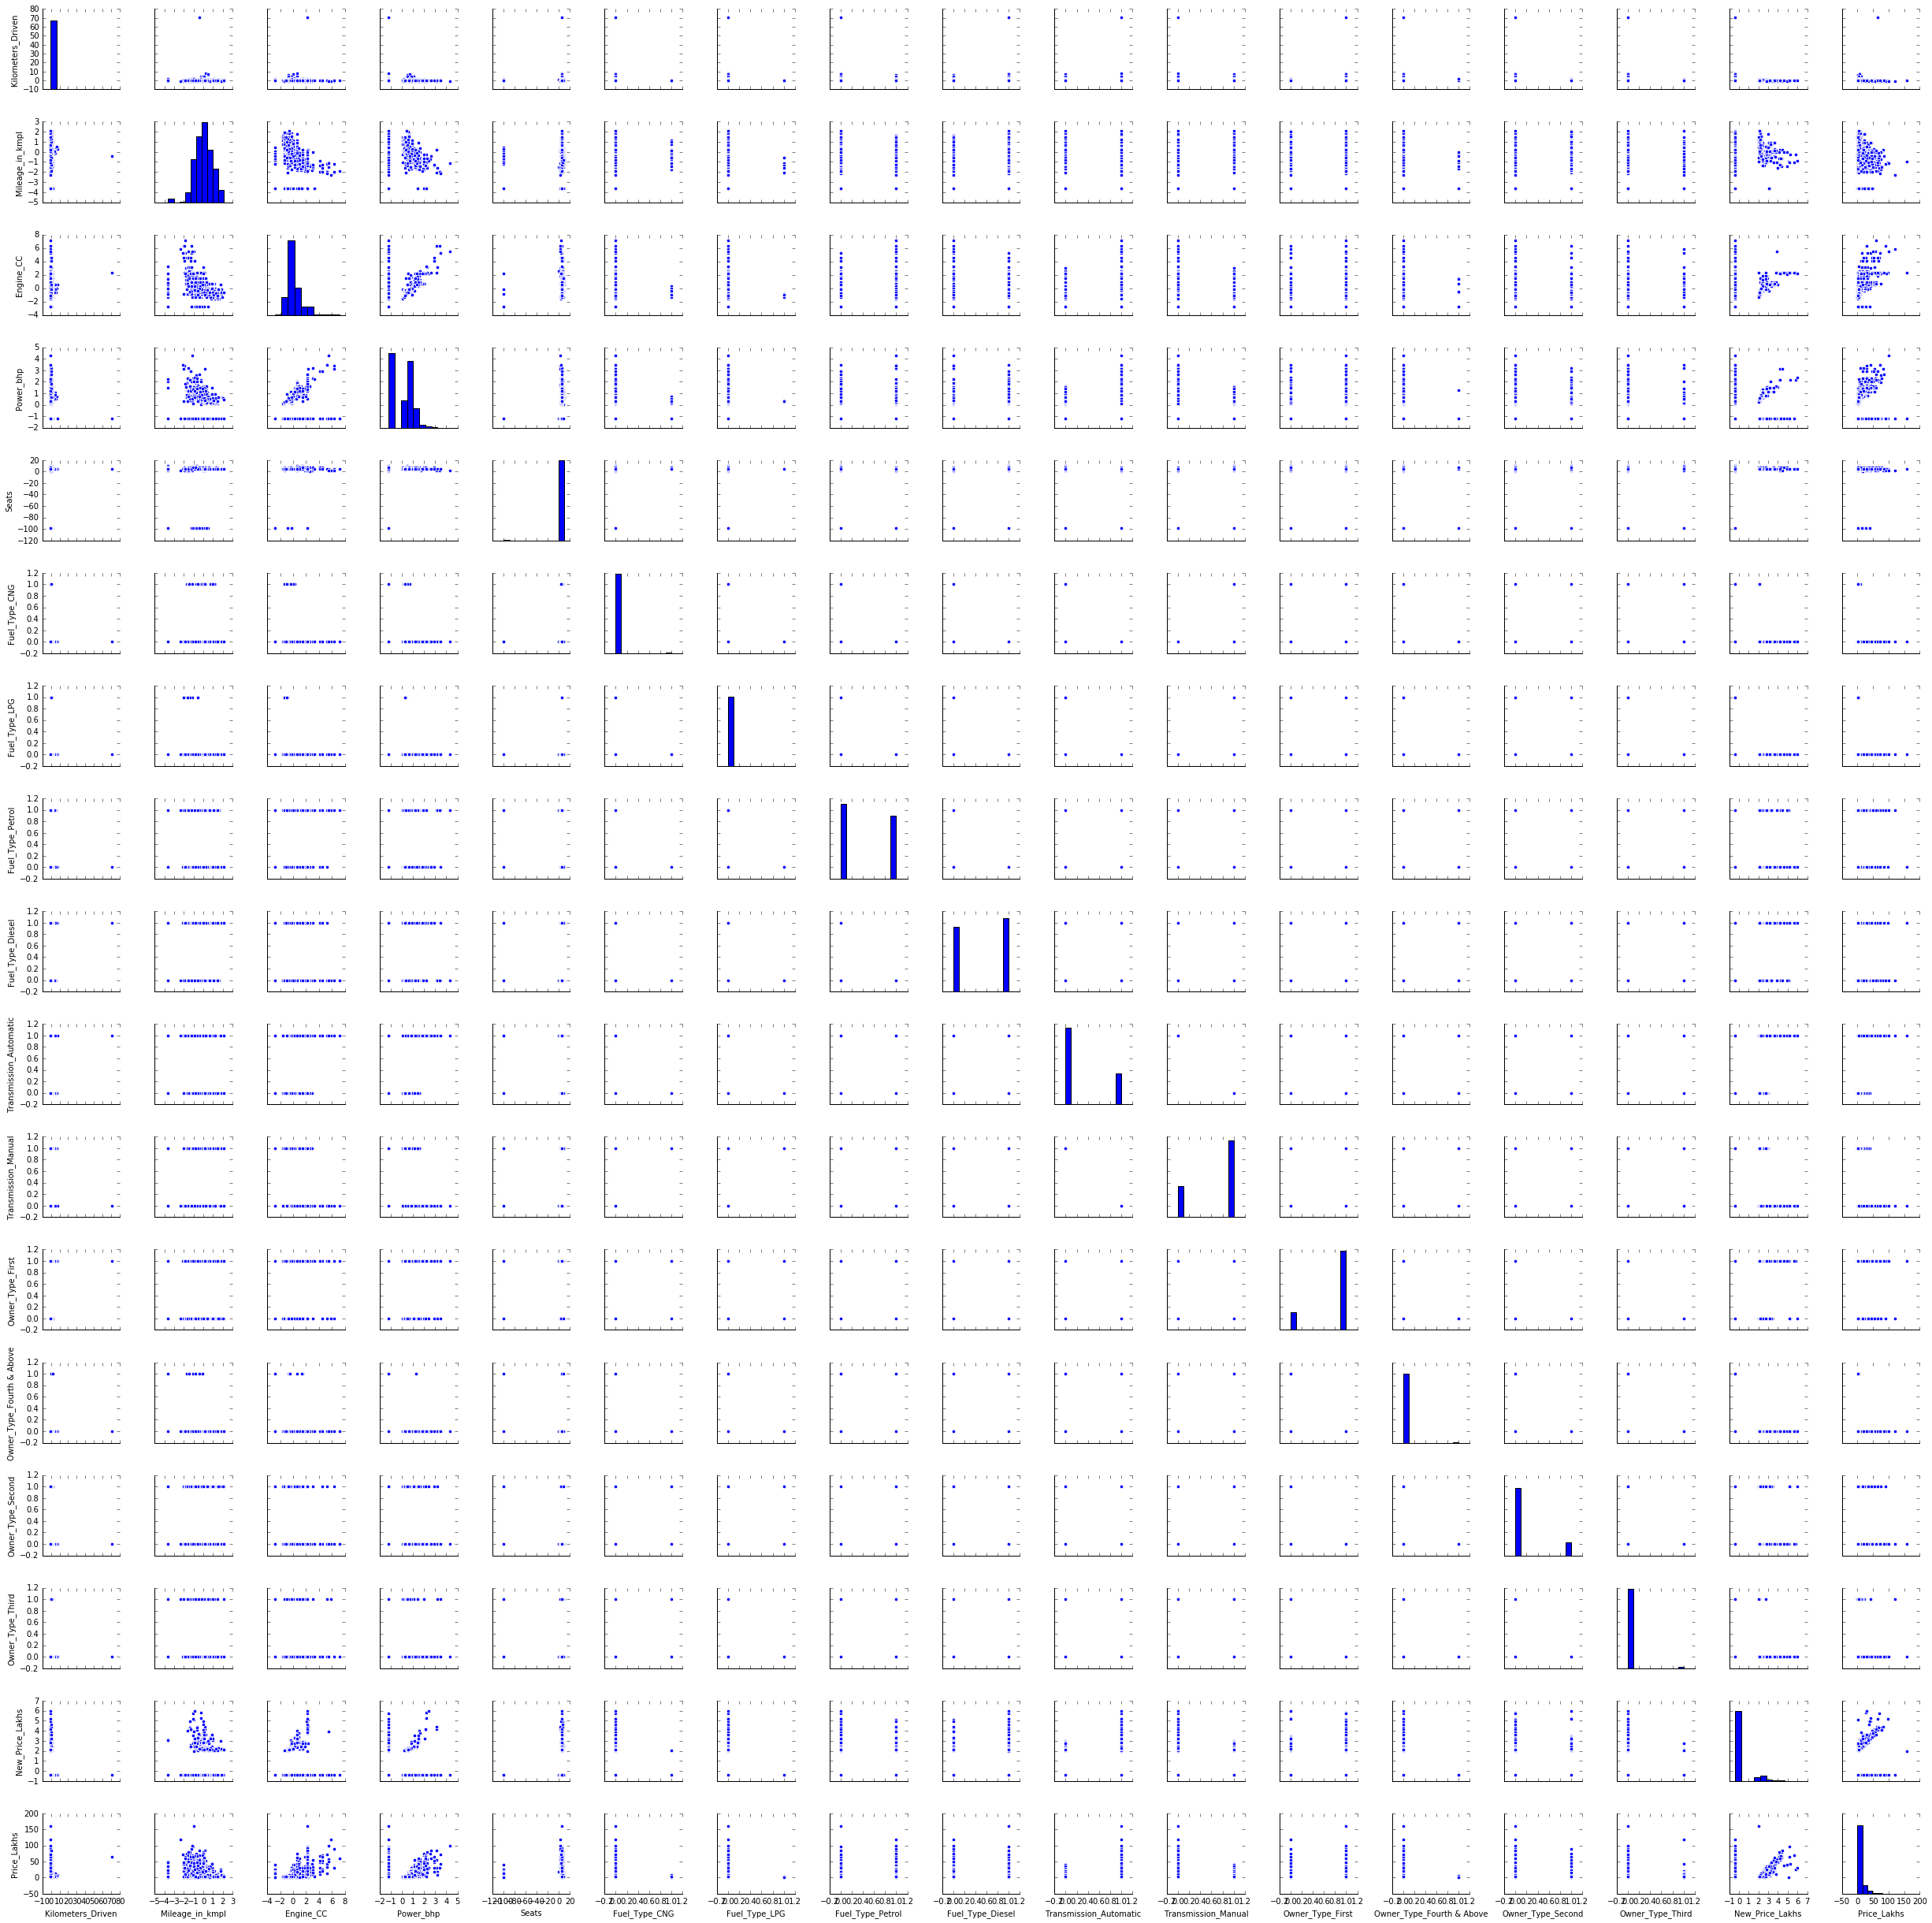

In [172]:
plt.style.use('classic')
%matplotlib inline
sns.pairplot(var_cor1, size=2)

In [173]:
#Dummies for test data
dummies = pd.get_dummies(cars_test['Fuel_Type']).rename(columns=lambda x: 'Fuel_Type_' + str(x))
cars_test = pd.concat([cars_test, dummies], axis=1)

In [174]:
cars_test = cars_test.drop(['Fuel_Type'],axis = 1)

In [175]:
dummies = pd.get_dummies(cars_test['Transmission']).rename(columns=lambda x: 'Transmission_' + str(x))
cars_test = pd.concat([cars_test, dummies], axis=1)
cars_test = cars_test.drop(['Transmission'],axis = 1)

dummies = pd.get_dummies(cars_test['Owner_Type']).rename(columns=lambda x: 'Owner_Type_' + str(x))
cars_test = pd.concat([cars_test, dummies], axis=1)
cars_test = cars_test.drop(['Owner_Type'],axis = 1)

In [176]:
cars_test.to_csv('C:/Users/Rohit/Anaconda3/Participants_Data_Used_Cars/cars_test1.csv')

In [177]:
cars_train = cars_train.rename(columns={'Owner_Type_Fourth & Above':'Owner_Type_Fourth_Above'})

In [178]:
cars_test = cars_test.rename(columns={'Owner_Type_Fourth & Above':'Owner_Type_Fourth_Above'})

Performing linear regression on the training dataset

In [206]:
import statsmodels.formula.api as smf
lm1 = smf.ols("""Price_Lakhs ~ Kilometers_Driven + Mileage_in_kmpl + Engine_CC + Power_bhp + Seats + Transmission_Automatic + Transmission_Manual + Owner_Type_First + Owner_Type_Second + New_Price_Lakhs""", data=cars_train).fit()

In [207]:
feature_cols1 = ['Kilometers_Driven','Mileage_in_kmpl','Engine_CC','Power_bhp','Seats','Transmission_Automatic','Transmission_Manual','Owner_Type_First','Owner_Type_Second','New_Price_Lakhs']
X_test1 = cars_test[feature_cols1]
predictions1 = lm1.predict(X_test1)
predictions1

0        2.253472
1       -2.175985
2       19.391339
3        5.023856
4        3.293507
5        9.757317
6       28.726238
7       -0.594772
8        3.075239
9       12.158606
10      15.544815
11       3.035994
12       3.503479
13       2.743571
14       6.243944
15      19.050342
16      19.614899
17       2.931899
18      12.165005
19       4.083972
20       3.546154
21       2.415698
22       0.339362
23       2.559974
24       6.208073
25       0.276944
26      -3.771103
27       8.625480
28      12.701459
29      -0.764616
          ...    
1204     9.404474
1205     6.941185
1206     8.558591
1207    -3.101381
1208     2.431930
1209     7.181790
1210    11.859348
1211     3.305022
1212    10.093278
1213     8.542517
1214    19.291626
1215     7.207484
1216     9.358631
1217     7.204438
1218     8.362946
1219    18.924516
1220    10.194892
1221     8.689245
1222    29.412928
1223     2.881807
1224     6.163425
1225     4.365236
1226     3.052428
1227    10.936113
1228    -0

In [208]:
predictions1 = pd.DataFrame(predictions1,columns = ['predictions'])
sum(n < 0 for n in predictions1.values.flatten())

76

In [209]:
predictions1_summ = lm1.summary()
predictions1_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_Lakhs   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     862.2
Date:                Wed, 03 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:58:10   Log-Likelihood:                -20573.
No. Observations:                6017   AIC:                         4.117e+04
Df Residuals:                    6007   BIC:                         4.123e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5.5318      0.454     12.182      0.000       4.642       6.422
Kilometers_Driven         -0.3048      0.097     -3.152      0.002      -0.494      -0.115
Mileage_in_kmpl            1.1139      0.134      8.335      0.000       0.852       1.376
Engine_CC                  6.3355      0.133     47.601      0.000       6.075       6.596
Power_bhp                  0.2455      0.097      2.521      0.012       0.055       0.436
Seats                     -0.1614      0.012    -13.704      0.000      -0.184      -0.138
Transmission_Automatic     6.7042      0.270     24.864      0.000       6.176       7.233
Transmission_Manual       -1.1723      0.247     -4.737      0.000      -1.657      -0.687
Owner_Type_First           4.0562      0.686      5.916      0.000       2.712       5.400
Owner_Type_Second          1.6932      0.713      2.374      0.018       0.295       3.091
New_Price_Lakhs            1.5396      0.098     15.703      0.000       1.347       1.732
==============================================================================
Omnibus:                     4193.355   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           191509.941
Skew:                           2.789   Prob(JB):                         0.00
Kurtosis:                      30.070   Cond. No.                     4.42e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.99e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [210]:
lm1

In [211]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
MSE_linear = cross_val_score(linear_reg, cars_train[feature_cols1], cars_train['Price_Lakhs'],scoring = 'neg_mean_squared_error',cv = 5)
mean_MSE_linear = py.mean(MSE_linear)
print(mean_MSE_linear)

-79.31507068563378


Performing Ridge Regression

In [212]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring = 'neg_mean_squared_error',cv=5)
ridge_regressor.fit(cars_train[feature_cols1],cars_train['Price_Lakhs'])


D:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning:

Ill-conditioned matrix (rcond=2.41185e-18): result may not be accurate.

D:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning:

Ill-conditioned matrix (rcond=7.9623e-19): result may not be accurate.

D:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning:

Ill-conditioned matrix (rcond=3.07643e-19): result may not be accurate.

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [213]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-78.22164431888984


Performing Lasso regression

In [215]:
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring = 'neg_mean_squared_error',cv=5)
lasso_regressor.fit(cars_train[feature_cols1],cars_train['Price_Lakhs'])
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



{'alpha': 1}
-62.54199412064314


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [216]:
ridge1 = ridge_regressor.predict(cars_test[feature_cols1])
lasso1 = lasso_regressor.predict(cars_test[feature_cols1])

In [217]:
ridge1
ridge1 = pd.DataFrame(ridge1,columns = ['predictions'])
sum(n < 0 for n in ridge1.values.flatten())

76

In [218]:
lasso1
lasso1 = pd.DataFrame(lasso1,columns = ['predictions'])
sum(n < 0 for n in lasso1.values.flatten())

4

On comparing the predictions using Linear regression, ridge regression and lasso regression we find that lasso gives the lowest Negative MSE and also the lowes number of negative prediction values for Price of used car as compared to 76 by linear and ridge.

Now let's try building a neural network to see if we get any better results for our used car price predictions.

In [223]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

We will use relu activation function for our neural network.

In [240]:
NN_cars = Sequential()

# The Input Layer :
NN_cars.add(Dense(128, kernel_initializer='normal',input_dim = cars_train[feature_cols1].shape[1], activation='relu'))

# The Hidden Layers :
NN_cars.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_cars.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_cars.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_cars.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_cars.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_cars.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 166,273
Trainable params: 166,273
Non-trainable params: 0
_________________________________________________________________


In [241]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
NN_cars.fit(cars_train[feature_cols1],cars_train['Price_Lakhs'], epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Train on 4813 samples, validate on 1204 samples
Epoch 1/500
4813/4813 [==============================] - 1s 239us/step - loss: 4.4205 - mean_absolute_error: 4.4205 - val_loss: 3.2933 - val_mean_absolute_error: 3.2933

Epoch 00001: val_loss improved from inf to 3.29326, saving model to Weights-001--3.29326.hdf5
Epoch 2/500
4813/4813 [==============================] - 1s 112us/step - loss: 3.4079 - mean_absolute_error: 3.4079 - val_loss: 3.0943 - val_mean_absolute_error: 3.0943

Epoch 00002: val_loss improved from 3.29326 to 3.09434, saving model to Weights-002--3.09434.hdf5
Epoch 3/500
4813/4813 [==============================] - 1s 124us/step - loss: 3.2668 - mean_absolute_error: 3.2668 - val_loss: 3.1617 - val_mean_absolute_error: 3.1617

Epoch 00003: val_loss did not improve from 3.09434
Epoch 4/500
4813/4813 [==============================] - 1s 120us/step - loss: 3.2747 - mean_absolute_error: 3.2747 - val_loss: 2.9521 - val_mean_absolute_error: 2.9521

Epoch 00004: val_loss improve

4813/4813 [==============================] - 1s 112us/step - loss: 2.6272 - mean_absolute_error: 2.6272 - val_loss: 2.8965 - val_mean_absolute_error: 2.8965

Epoch 00036: val_loss did not improve from 2.71287
Epoch 37/500
4813/4813 [==============================] - 1s 128us/step - loss: 2.6085 - mean_absolute_error: 2.6085 - val_loss: 2.7330 - val_mean_absolute_error: 2.7330

Epoch 00037: val_loss did not improve from 2.71287
Epoch 38/500
4813/4813 [==============================] - 1s 137us/step - loss: 2.5947 - mean_absolute_error: 2.5947 - val_loss: 2.7310 - val_mean_absolute_error: 2.7310

Epoch 00038: val_loss did not improve from 2.71287
Epoch 39/500
4813/4813 [==============================] - 1s 123us/step - loss: 2.5407 - mean_absolute_error: 2.5407 - val_loss: 2.8716 - val_mean_absolute_error: 2.8716

Epoch 00039: val_loss did not improve from 2.71287
Epoch 40/500
4813/4813 [==============================] - 1s 122us/step - loss: 2.5902 - mean_absolute_error: 2.5902 - val_lo

4813/4813 [==============================] - 1s 124us/step - loss: 2.3285 - mean_absolute_error: 2.3285 - val_loss: 2.6382 - val_mean_absolute_error: 2.6382

Epoch 00071: val_loss did not improve from 2.56853
Epoch 72/500
4813/4813 [==============================] - 1s 117us/step - loss: 2.3297 - mean_absolute_error: 2.3297 - val_loss: 2.5269 - val_mean_absolute_error: 2.5269

Epoch 00072: val_loss improved from 2.56853 to 2.52686, saving model to Weights-072--2.52686.hdf5
Epoch 73/500
4813/4813 [==============================] - 1s 123us/step - loss: 2.3019 - mean_absolute_error: 2.3019 - val_loss: 2.6624 - val_mean_absolute_error: 2.6624

Epoch 00073: val_loss did not improve from 2.52686
Epoch 74/500
4813/4813 [==============================] - 1s 128us/step - loss: 2.2976 - mean_absolute_error: 2.2976 - val_loss: 2.7067 - val_mean_absolute_error: 2.7067

Epoch 00074: val_loss did not improve from 2.52686
Epoch 75/500
4813/4813 [==============================] - 1s 122us/step - loss

4813/4813 [==============================] - 1s 123us/step - loss: 2.0667 - mean_absolute_error: 2.0667 - val_loss: 2.5545 - val_mean_absolute_error: 2.5545

Epoch 00107: val_loss did not improve from 2.48281
Epoch 108/500
4813/4813 [==============================] - 1s 119us/step - loss: 2.0649 - mean_absolute_error: 2.0649 - val_loss: 2.5634 - val_mean_absolute_error: 2.5634

Epoch 00108: val_loss did not improve from 2.48281
Epoch 109/500
4813/4813 [==============================] - 1s 123us/step - loss: 2.1287 - mean_absolute_error: 2.1287 - val_loss: 2.5431 - val_mean_absolute_error: 2.5431

Epoch 00109: val_loss did not improve from 2.48281
Epoch 110/500
4813/4813 [==============================] - 1s 124us/step - loss: 2.1203 - mean_absolute_error: 2.1203 - val_loss: 2.5046 - val_mean_absolute_error: 2.5046

Epoch 00110: val_loss did not improve from 2.48281
Epoch 111/500
4813/4813 [==============================] - 1s 125us/step - loss: 2.0443 - mean_absolute_error: 2.0443 - va

4813/4813 [==============================] - 1s 132us/step - loss: 1.9010 - mean_absolute_error: 1.9010 - val_loss: 2.4035 - val_mean_absolute_error: 2.4035

Epoch 00143: val_loss did not improve from 2.40294
Epoch 144/500
4813/4813 [==============================] - 1s 140us/step - loss: 1.9208 - mean_absolute_error: 1.9208 - val_loss: 2.4291 - val_mean_absolute_error: 2.4291

Epoch 00144: val_loss did not improve from 2.40294
Epoch 145/500
4813/4813 [==============================] - 1s 142us/step - loss: 1.9077 - mean_absolute_error: 1.9077 - val_loss: 2.6626 - val_mean_absolute_error: 2.6626

Epoch 00145: val_loss did not improve from 2.40294
Epoch 146/500
4813/4813 [==============================] - 1s 134us/step - loss: 1.8958 - mean_absolute_error: 1.8958 - val_loss: 2.4149 - val_mean_absolute_error: 2.4149

Epoch 00146: val_loss did not improve from 2.40294
Epoch 147/500
4813/4813 [==============================] - 1s 138us/step - loss: 1.8723 - mean_absolute_error: 1.8723 - va

4813/4813 [==============================] - 1s 123us/step - loss: 1.7835 - mean_absolute_error: 1.7835 - val_loss: 2.4693 - val_mean_absolute_error: 2.4693

Epoch 00180: val_loss did not improve from 2.40294
Epoch 181/500
4813/4813 [==============================] - 1s 124us/step - loss: 1.7626 - mean_absolute_error: 1.7626 - val_loss: 2.7729 - val_mean_absolute_error: 2.7729

Epoch 00181: val_loss did not improve from 2.40294
Epoch 182/500
4813/4813 [==============================] - 1s 123us/step - loss: 1.8055 - mean_absolute_error: 1.8055 - val_loss: 2.4208 - val_mean_absolute_error: 2.4208

Epoch 00182: val_loss did not improve from 2.40294
Epoch 183/500
4813/4813 [==============================] - 1s 124us/step - loss: 1.7731 - mean_absolute_error: 1.7731 - val_loss: 2.5319 - val_mean_absolute_error: 2.5319

Epoch 00183: val_loss did not improve from 2.40294
Epoch 184/500
4813/4813 [==============================] - 1s 124us/step - loss: 1.7407 - mean_absolute_error: 1.7407 - va

4813/4813 [==============================] - 1s 124us/step - loss: 1.6296 - mean_absolute_error: 1.6296 - val_loss: 2.5056 - val_mean_absolute_error: 2.5056

Epoch 00217: val_loss did not improve from 2.40294
Epoch 218/500
4813/4813 [==============================] - 1s 124us/step - loss: 1.6544 - mean_absolute_error: 1.6544 - val_loss: 2.4414 - val_mean_absolute_error: 2.4414

Epoch 00218: val_loss did not improve from 2.40294
Epoch 219/500
4813/4813 [==============================] - 1s 122us/step - loss: 1.6579 - mean_absolute_error: 1.6579 - val_loss: 2.5768 - val_mean_absolute_error: 2.5768

Epoch 00219: val_loss did not improve from 2.40294
Epoch 220/500
4813/4813 [==============================] - 1s 124us/step - loss: 1.6541 - mean_absolute_error: 1.6541 - val_loss: 2.4774 - val_mean_absolute_error: 2.4774

Epoch 00220: val_loss did not improve from 2.40294
Epoch 221/500
4813/4813 [==============================] - 1s 122us/step - loss: 1.6177 - mean_absolute_error: 1.6177 - va

4813/4813 [==============================] - 1s 139us/step - loss: 1.5728 - mean_absolute_error: 1.5728 - val_loss: 2.4639 - val_mean_absolute_error: 2.4639

Epoch 00254: val_loss did not improve from 2.40294
Epoch 255/500
4813/4813 [==============================] - 1s 138us/step - loss: 1.5344 - mean_absolute_error: 1.5344 - val_loss: 2.4328 - val_mean_absolute_error: 2.4328

Epoch 00255: val_loss did not improve from 2.40294
Epoch 256/500
4813/4813 [==============================] - 1s 133us/step - loss: 1.5090 - mean_absolute_error: 1.5090 - val_loss: 2.4835 - val_mean_absolute_error: 2.4835

Epoch 00256: val_loss did not improve from 2.40294
Epoch 257/500
4813/4813 [==============================] - 1s 132us/step - loss: 1.5308 - mean_absolute_error: 1.5308 - val_loss: 2.4493 - val_mean_absolute_error: 2.4493

Epoch 00257: val_loss did not improve from 2.40294
Epoch 258/500
4813/4813 [==============================] - 1s 132us/step - loss: 1.5213 - mean_absolute_error: 1.5213 - va

4813/4813 [==============================] - 1s 119us/step - loss: 1.4596 - mean_absolute_error: 1.4596 - val_loss: 2.5747 - val_mean_absolute_error: 2.5747

Epoch 00291: val_loss did not improve from 2.40294
Epoch 292/500
4813/4813 [==============================] - 1s 123us/step - loss: 1.4522 - mean_absolute_error: 1.4522 - val_loss: 2.5108 - val_mean_absolute_error: 2.5108

Epoch 00292: val_loss did not improve from 2.40294
Epoch 293/500
4813/4813 [==============================] - 1s 122us/step - loss: 1.4400 - mean_absolute_error: 1.4400 - val_loss: 2.4934 - val_mean_absolute_error: 2.4934

Epoch 00293: val_loss did not improve from 2.40294
Epoch 294/500
4813/4813 [==============================] - 1s 119us/step - loss: 1.4834 - mean_absolute_error: 1.4834 - val_loss: 2.5038 - val_mean_absolute_error: 2.5038

Epoch 00294: val_loss did not improve from 2.40294
Epoch 295/500
4813/4813 [==============================] - 1s 122us/step - loss: 1.4469 - mean_absolute_error: 1.4469 - va

4813/4813 [==============================] - 1s 127us/step - loss: 1.4119 - mean_absolute_error: 1.4119 - val_loss: 2.4670 - val_mean_absolute_error: 2.4670

Epoch 00328: val_loss did not improve from 2.40294
Epoch 329/500
4813/4813 [==============================] - 1s 122us/step - loss: 1.4089 - mean_absolute_error: 1.4089 - val_loss: 2.4524 - val_mean_absolute_error: 2.4524

Epoch 00329: val_loss did not improve from 2.40294
Epoch 330/500
4813/4813 [==============================] - 1s 122us/step - loss: 1.3891 - mean_absolute_error: 1.3891 - val_loss: 2.4893 - val_mean_absolute_error: 2.4893

Epoch 00330: val_loss did not improve from 2.40294
Epoch 331/500
4813/4813 [==============================] - 1s 117us/step - loss: 1.3954 - mean_absolute_error: 1.3954 - val_loss: 2.4884 - val_mean_absolute_error: 2.4884

Epoch 00331: val_loss did not improve from 2.40294
Epoch 332/500
4813/4813 [==============================] - 1s 123us/step - loss: 1.3770 - mean_absolute_error: 1.3770 - va

4813/4813 [==============================] - 1s 145us/step - loss: 1.3716 - mean_absolute_error: 1.3716 - val_loss: 2.5590 - val_mean_absolute_error: 2.5590

Epoch 00365: val_loss did not improve from 2.40294
Epoch 366/500
4813/4813 [==============================] - 1s 137us/step - loss: 1.3929 - mean_absolute_error: 1.3929 - val_loss: 2.5294 - val_mean_absolute_error: 2.5294

Epoch 00366: val_loss did not improve from 2.40294
Epoch 367/500
4813/4813 [==============================] - 1s 129us/step - loss: 1.3475 - mean_absolute_error: 1.3475 - val_loss: 2.4875 - val_mean_absolute_error: 2.4875

Epoch 00367: val_loss did not improve from 2.40294
Epoch 368/500
4813/4813 [==============================] - 1s 136us/step - loss: 1.3551 - mean_absolute_error: 1.3551 - val_loss: 2.5165 - val_mean_absolute_error: 2.5165

Epoch 00368: val_loss did not improve from 2.40294
Epoch 369/500
4813/4813 [==============================] - 1s 136us/step - loss: 1.3786 - mean_absolute_error: 1.3786 - va

4813/4813 [==============================] - 1s 125us/step - loss: 1.2990 - mean_absolute_error: 1.2990 - val_loss: 2.5215 - val_mean_absolute_error: 2.5215

Epoch 00402: val_loss did not improve from 2.40294
Epoch 403/500
4813/4813 [==============================] - 1s 121us/step - loss: 1.2619 - mean_absolute_error: 1.2619 - val_loss: 2.5101 - val_mean_absolute_error: 2.5101

Epoch 00403: val_loss did not improve from 2.40294
Epoch 404/500
4813/4813 [==============================] - 1s 124us/step - loss: 1.2860 - mean_absolute_error: 1.2860 - val_loss: 2.4841 - val_mean_absolute_error: 2.4841

Epoch 00404: val_loss did not improve from 2.40294
Epoch 405/500
4813/4813 [==============================] - 1s 120us/step - loss: 1.2861 - mean_absolute_error: 1.2861 - val_loss: 2.5712 - val_mean_absolute_error: 2.5712

Epoch 00405: val_loss did not improve from 2.40294
Epoch 406/500
4813/4813 [==============================] - 1s 124us/step - loss: 1.3027 - mean_absolute_error: 1.3027 - va

4813/4813 [==============================] - 1s 104us/step - loss: 1.2717 - mean_absolute_error: 1.2717 - val_loss: 2.5175 - val_mean_absolute_error: 2.5175

Epoch 00439: val_loss did not improve from 2.40294
Epoch 440/500
4813/4813 [==============================] - 1s 123us/step - loss: 1.2303 - mean_absolute_error: 1.2303 - val_loss: 2.4828 - val_mean_absolute_error: 2.4828

Epoch 00440: val_loss did not improve from 2.40294
Epoch 441/500
4813/4813 [==============================] - 1s 118us/step - loss: 1.2337 - mean_absolute_error: 1.2337 - val_loss: 2.5284 - val_mean_absolute_error: 2.5284

Epoch 00441: val_loss did not improve from 2.40294
Epoch 442/500
4813/4813 [==============================] - 1s 120us/step - loss: 1.2707 - mean_absolute_error: 1.2707 - val_loss: 2.5373 - val_mean_absolute_error: 2.5373

Epoch 00442: val_loss did not improve from 2.40294
Epoch 443/500
4813/4813 [==============================] - 1s 120us/step - loss: 1.2464 - mean_absolute_error: 1.2464 - va

4813/4813 [==============================] - 1s 129us/step - loss: 1.2196 - mean_absolute_error: 1.2196 - val_loss: 2.6104 - val_mean_absolute_error: 2.6104

Epoch 00476: val_loss did not improve from 2.40294
Epoch 477/500
4813/4813 [==============================] - 1s 138us/step - loss: 1.2062 - mean_absolute_error: 1.2062 - val_loss: 2.5801 - val_mean_absolute_error: 2.5801

Epoch 00477: val_loss did not improve from 2.40294
Epoch 478/500
4813/4813 [==============================] - 1s 139us/step - loss: 1.1897 - mean_absolute_error: 1.1897 - val_loss: 2.5479 - val_mean_absolute_error: 2.5479

Epoch 00478: val_loss did not improve from 2.40294
Epoch 479/500
4813/4813 [==============================] - 1s 135us/step - loss: 1.1991 - mean_absolute_error: 1.1991 - val_loss: 2.5099 - val_mean_absolute_error: 2.5099

Epoch 00479: val_loss did not improve from 2.40294
Epoch 480/500
4813/4813 [==============================] - 1s 135us/step - loss: 1.2024 - mean_absolute_error: 1.2024 - va

In [242]:
weights_file = 'Weights-426--2.36348.hdf5' # choose the best checkpoint 
NN_cars.load_weights(weights_file) # load it
NN_cars.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [243]:
NN_cars = NN_cars.predict(cars_test[feature_cols1])

In [244]:
nn_pred
nn_pred1 = pd.DataFrame(nn_pred,columns = ['predictions'])
sum(n < 0 for n in nn_pred1.values.flatten())

0

In [325]:
nn_pred

array([[ 3.244906 ],
       [ 2.9849505],
       [20.590303 ],
       ...,
       [ 8.452419 ],
       [ 4.9514117],
       [ 5.9929757]], dtype=float32)

In [245]:
nn_pred1.to_csv('C:/Users/Rohit/Anaconda3/Participants_Data_Used_Cars/Neural_Network_Predictions.csv')

In [246]:
nn_pred1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 1 columns):
predictions    1234 non-null float32
dtypes: float32(1)
memory usage: 4.9 KB


Runnibg XGBoost

In [247]:
from scipy.stats import skew
from collections import OrderedDict
from xgboost import plot_importance
from sklearn.model_selection import KFold

In [314]:
xg_cars_train = xgboost.XGBRegressor(colsample_bytree=0.2,
                 gamma=0,                 
                 learning_rate=0.02,
                 max_depth=5,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [315]:
xg_cars_train.fit(cars_train[feature_cols1],cars_train['Price_Lakhs'])

[20:51:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2, gamma=0,
       importance_type='gain', learning_rate=0.02, max_delta_step=0,
       max_depth=5, min_child_weight=1.5, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
       silent=None, subsample=0.6, verbosity=1)

In [316]:
xg_pred = xg_cars_train.predict(cars_test[feature_cols1])

In [317]:
xg_pred
xg_pred1 = pd.DataFrame(xg_pred,columns = ['predictions'])
sum(n < 0 for n in xg_pred1.values.flatten())

24

In [318]:
xg_pred1.to_csv('C:/Users/Rohit/Anaconda3/Participants_Data_Used_Cars/XG_Predictions.csv')

Random Forest

In [319]:
from sklearn.ensemble import RandomForestRegressor
rf_cars_train = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_cars_train.fit(cars_train[feature_cols1], cars_train['Price_Lakhs'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [321]:
rf_pred = rf_cars_train.predict(cars_test[feature_cols1])
rf_pred

array([ 3.94960417,  2.70063   , 21.31057   , ...,  5.47522333,
        5.53324   , 12.77488   ])

In [323]:
rf_pred1 = pd.DataFrame(rf_pred,columns = ['predictions'])
sum(n < 0 for n in rf_pred1.values.flatten())

0

In [324]:
rf_pred1.to_csv('C:/Users/Rohit/Anaconda3/Participants_Data_Used_Cars/RF_Predictions.csv')

In [335]:
from xlsxwriter.workbook import Workbook
import glob
for csvfile in glob.glob(os.path.join('C:/Users/Rohit/Anaconda3/Participants_Data_Used_Cars/RK_Lasso_Predictions.csv')):
    workbook = Workbook(csvfile[:-4] + '.xlsx')
    worksheet = workbook.add_worksheet()
    with open(csvfile, 'rt', encoding='utf8') as f:
        reader = csv.reader(f)
        for r, row in enumerate(reader):
            for c, col in enumerate(row):
                worksheet.write(r, c, col)
    workbook.close()

In [334]:
lasso1.to_csv('C:/Users/Rohit/Anaconda3/Participants_Data_Used_Cars/RK_Lasso_Predictions.csv')